# IntroStat Week 9

Welcome to the 9th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 9.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp


### Example: Ozon concentration

Today, we will be using the same data for all examples

The **Airquality dataset**

In [2]:
# Find the "airquality" dataset and print first 10 rows:
Air = sm.datasets.get_rdataset("airquality").data
print(Air.head(10))

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
5   28.0      NaN  14.9    66      5    6
6   23.0    299.0   8.6    65      5    7
7   19.0     99.0  13.8    59      5    8
8    8.0     19.0  20.1    61      5    9
9    NaN    194.0   8.6    69      5   10


Daily readings of the following air quality values for May 1, 1973 (a Tuesday) to September 30, 1973:

- Ozone: Mean ozone in parts per billion from 1300 to 1500 hours at Roosevelt Island

- Solar.R: Solar radiation in Langleys in the frequency band 4000–7700 Angstroms from 0800 to 1200 hours at Central Park

- Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport

- Temp: Maximum daily temperature in degrees Fahrenheit at La Guardia Airport.

Notice the dataset has some missing values (NaN)

In [3]:
# How many rows? (obs: number of observations is smaller due to missing values in dataset)
print(len(Air))

153


In [20]:
# The dataset is now a *Pandas Dataframe*
print(type(Air))

<class 'pandas.core.frame.DataFrame'>


When working with "real" data one typically need to do some *data-wrangling* 

This may include joining data from different tables, re-ordering data, re-structuring the dataset

Today we need to rename a column:

In [21]:
# rename "Solar.R", because the use of "." means something else in python and this could give rise to errors:
Air = Air.rename(columns={"Solar.R": "SolarR"})
print(Air.head(10))

   Ozone  SolarR  Wind  Temp  Month  Day
0   41.0   190.0   7.4    67      5    1
1   36.0   118.0   8.0    72      5    2
2   12.0   149.0  12.6    74      5    3
3   18.0   313.0  11.5    62      5    4
4    NaN     NaN  14.3    56      5    5
5   28.0     NaN  14.9    66      5    6
6   23.0   299.0   8.6    65      5    7
7   19.0    99.0  13.8    59      5    8
8    8.0    19.0  20.1    61      5    9
9    NaN   194.0   8.6    69      5   10


#### We are interested in the Ozone values 

How does Ozone depend on solar radiation, wind and temperature?

<Axes: xlabel='Temp', ylabel='Ozone'>

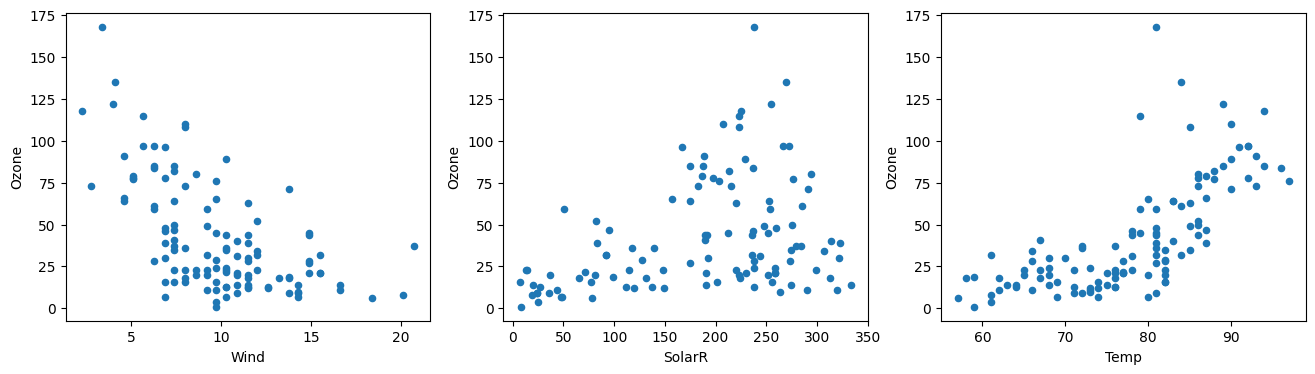

In [22]:
# Visualise the data

# split to make 3 plots:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16,4))

# scatter plots with Ozone versus the three other columns
Air.plot.scatter('Wind',    'Ozone', ax=ax0) # ax=ax0 means that the plot will be in the first subplot
Air.plot.scatter('SolarR',  'Ozone', ax=ax1) 
Air.plot.scatter('Temp',    'Ozone', ax=ax2) 

The second plot seems to have variance increasing with increasing solar radiation

All plots seem to have more Ozone values that are relatively small and fewer values that are relatively large

We will now inspect the distribution of Ozone values (and consider whether a data-transformation a appropriate)

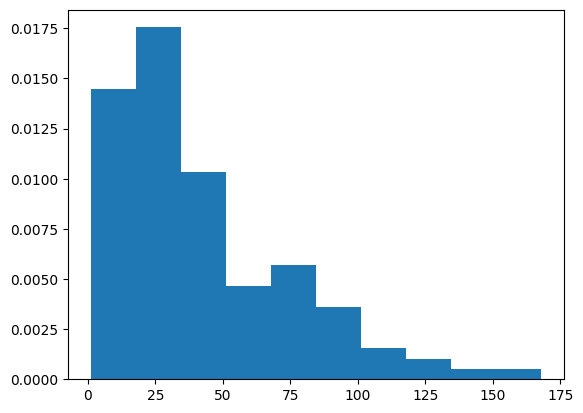

In [23]:
# Do a histogram of "Ozone" column
plt.hist(Air["Ozone"], density=True)
plt.show()

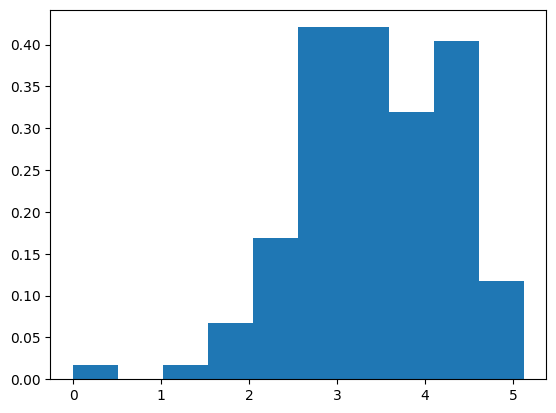

In [25]:
# Since the distribution is very skewed we will do a data-transformation and compute the logarithm of the Ozone column:
Air["logOzone"] = np.log(Air["Ozone"])   # this creates an axtra column in the dataframe
plt.hist(Air["logOzone"], density=True)
plt.show()

This distribution is nicer (but maybe not perfect - the value with logOzone=0 could be considered an outlier)

<Axes: xlabel='Temp', ylabel='logOzone'>

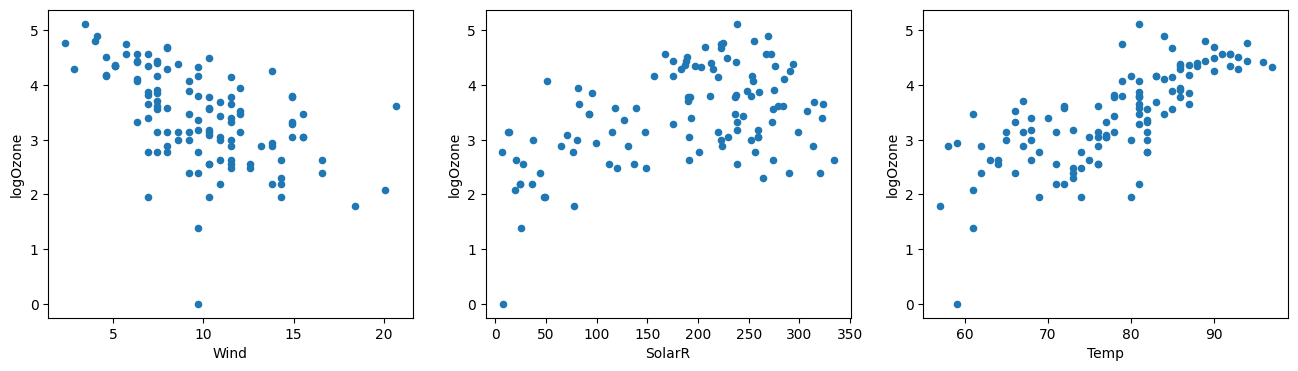

In [26]:
# Visualise the transformed data

# split to make 3 plots:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16,4))

# scatter plots with logOzone versus the three other columns
Air.plot.scatter('Wind',    'logOzone', ax=ax0) # Again, ax=ax0 means that the plot will be in the first subplot
Air.plot.scatter('SolarR',  'logOzone', ax=ax1)
Air.plot.scatter('Temp',    'logOzone', ax=ax2)

Considerations:

The datapoint with logOzone=0 could be an outlier - maybe we should remove it from the dataset.

We could model logOzone as a linear function of either wind, solar radiation or temperature. A linear regression models seems suitable. 

In [27]:
# remove the outlier:
Air = Air[(Air["logOzone"] != 0)]

In [28]:
print(len(Air))

152


#### Now we do **Simple Linear Regression** with one explanatory variable at the time

In [29]:
# logOzone and temperature:
fit_temp = smf.ols(formula = 'logOzone ~ Temp', data=Air).fit()
print(fit_temp.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.536
No. Observations:                 115   F-statistic:                     132.8
Covariance Type:            nonrobust   Prob (F-statistic):           8.70e-21
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5004      0.433     -3.469      0.001      -2.357      -0.643
Temp           0.0634      0.006     11.522      0.000       0.053       0.074

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


### **>>> Kahoot 1 (3 questions)**

In [30]:
# Get prediction based on the model:
temp_range = pd.DataFrame({'Temp': np.arange(50,110, 10)})
pred = fit_temp.get_prediction(temp_range).summary_frame(alpha=0.05) # alpha=0.05 means 95% intervals
print(pred.head())

       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  1.670404  0.162595       1.348274       1.992534      0.534082   
1  2.304558  0.111726       2.083209       2.525907      1.192598   
2  2.938712  0.067721       2.804544       3.072880      1.840777   
3  3.572866  0.052418       3.469016       3.676717      2.478222   
4  4.207021  0.083470       4.041652       4.372389      3.104837   

   obs_ci_upper  
0      2.806726  
1      3.416519  
2      4.036648  
3      4.667511  
4      5.309204  


### **>>> Kahoot 2 (1 questions)**

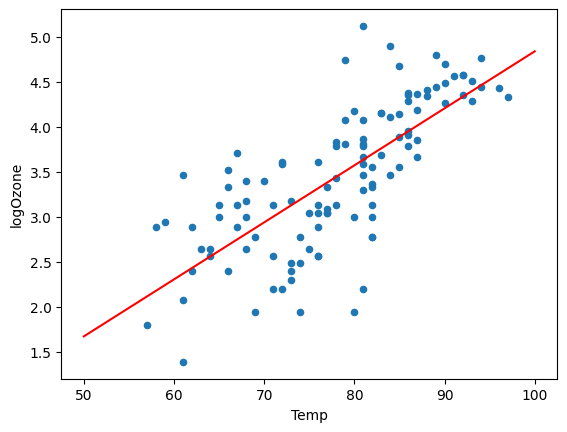

In [31]:
# Plot data with model predictions:
Air.plot.scatter('Temp',    'logOzone')
plt.plot(temp_range, pred["mean"], color="red") # adding the model prediction
plt.show()

Nice - this is a simple linear regression model with temperature as explanatory variable (and logOzone as dependen variable / outcome variable)

Lets try another explanatory variable:

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.172
No. Observations:                 110   F-statistic:                     23.70
Covariance Type:            nonrobust   Prob (F-statistic):           3.87e-06
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7392      0.161     16.982      0.000       2.419       3.059
SolarR         0.0038      0.001      4.868      0.000       0.002       0.005

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


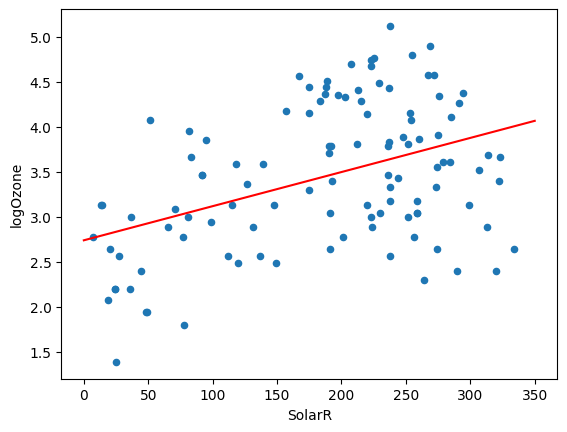

In [33]:
# logOzone verus solar radiation:

# fit the model
fit_rad = smf.ols(formula = 'logOzone ~ SolarR', data=Air).fit()
print(fit_rad.summary(slim=True))

# Get prediction based on the model:
rad_range = pd.DataFrame({'SolarR': np.arange(0,360, 10)}) # range of all values of SolarR
pred = fit_rad.get_prediction(rad_range).summary_frame(alpha=0.05)

# Plot data with model predictions:
Air.plot.scatter('SolarR',    'logOzone')
plt.plot(rad_range, pred["mean"], color="red") # again, adding the model prediction to the same plot
plt.show()


Nice.

Now we try the last explanatory variable:

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
No. Observations:                 115   F-statistic:                     57.65
Covariance Type:            nonrobust   Prob (F-statistic):           9.73e-12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7377      0.181     26.227      0.000       4.380       5.096
Wind          -0.1307      0.017     -7.593      0.000      -0.165      -0.097

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


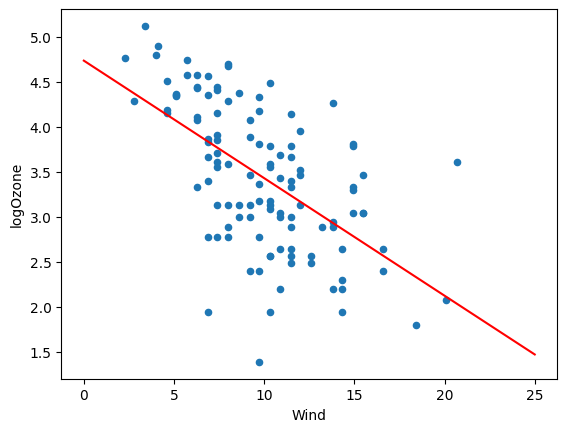

In [34]:
# logOzone verus wind:

# fit the model
fit_wind = smf.ols(formula = 'logOzone ~ Wind', data=Air).fit()
print(fit_wind.summary(slim=True))

# Get prediction based on the model:
wind_range = pd.DataFrame({'Wind': np.arange(0,30,5)})
pred = fit_wind.get_prediction(wind_range).summary_frame(alpha=0.05)

# Plot data with model predictions:
Air.plot.scatter('Wind',    'logOzone')
plt.plot(wind_range, pred["mean"], color="red")
plt.show()


#### Can we somehow combine all the variables into one model?? 

#### The answer is yes - with **Multiple Linear Regression** 

(return to slides/blackboard before proceding)

### Example: Ozon concentration with Multiple Linear Regression

In [36]:
# Mulitiple Linear Regression

# fit the full model with 3 explanatopry variables:
fit_full_model = smf.ols(formula = 'logOzone ~ Temp + SolarR + Wind', data=Air).fit()  # Notice how the model is formulated in python!
print(fit_full_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.664
No. Observations:                 110   F-statistic:                     72.91
Covariance Type:            nonrobust   Prob (F-statistic):           1.16e-25
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2614      0.520      0.502      0.617      -0.770       1.293
Temp           0.0445      0.006      7.829      0.000       0.033       0.056
SolarR         0.0022      0.001      4.248      0.000       0.001       0.003
Wind          -0.0693      0.015     -4.774      0.000      -0.098      -0.041

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

There is a coefficient (parameter estimate) for each explanatory variable in the model (+ for the intercept)

Each parameter estimate also has a Standard Error

For each parameter a t-test is performed (t_obs and p-values and confidence intervals are calculated)

### Example: Confidence and prediction intervals

In [37]:
# We will now predict for many values of Temp and Wind (but keep SolarR constant in order to be able to plot in 3D)

Temp_range = np.linspace(50, 100, 100)
Wind_range = np.linspace(0, 25, 100)
SolarR_new = Air["SolarR"].mean()

Temp_new, Wind_new = np.meshgrid(Temp_range, Wind_range)        # make a meshgrid

In [38]:
New_data = pd.DataFrame({'Temp':   Temp_new.reshape(1,-1)[0],   # a bit of "wrangling" is needed
                         'SolarR': SolarR_new,
                         'Wind':   Wind_new.reshape(1,-1)[0]})
print(New_data)

            Temp      SolarR  Wind
0      50.000000  187.158621   0.0
1      50.505051  187.158621   0.0
2      51.010101  187.158621   0.0
3      51.515152  187.158621   0.0
4      52.020202  187.158621   0.0
...          ...         ...   ...
9995   97.979798  187.158621  25.0
9996   98.484848  187.158621  25.0
9997   98.989899  187.158621  25.0
9998   99.494949  187.158621  25.0
9999  100.000000  187.158621  25.0

[10000 rows x 3 columns]


In [39]:
pred = fit_full_model.get_prediction(New_data).summary_frame(alpha=0.05)    # get predictions
New_data_with_pred = pd.concat([New_data, pred], axis=1)                    # merge data with predictions
print(New_data_with_pred.head(10))
print(len(New_data_with_pred))

        Temp      SolarR  Wind      mean   mean_se  mean_ci_lower  \
0  50.000000  187.158621   0.0  2.894243  0.265920       2.367030   
1  50.505051  187.158621   0.0  2.916696  0.263441       2.394399   
2  51.010101  187.158621   0.0  2.939149  0.260969       2.421752   
3  51.515152  187.158621   0.0  2.961602  0.258506       2.449089   
4  52.020202  187.158621   0.0  2.984055  0.256051       2.476409   
5  52.525253  187.158621   0.0  3.006508  0.253605       2.503712   
6  53.030303  187.158621   0.0  3.028961  0.251167       2.530997   
7  53.535354  187.158621   0.0  3.051414  0.248739       2.558264   
8  54.040404  187.158621   0.0  3.073867  0.246321       2.585512   
9  54.545455  187.158621   0.0  3.096320  0.243912       2.612741   

   mean_ci_upper  obs_ci_lower  obs_ci_upper  
0       3.421455      1.829490      3.958995  
1       3.438993      1.854369      3.979023  
2       3.456545      1.879222      3.999075  
3       3.474115      1.904051      4.019153  
4    

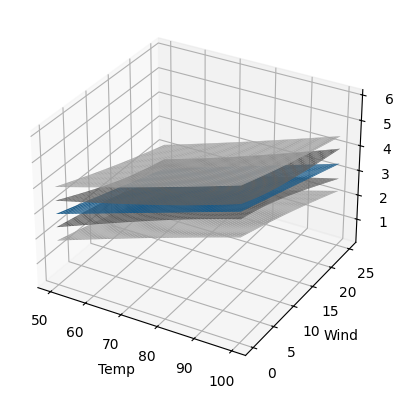

In [40]:
# Create a 3D plot 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a surface
ax.plot_surface(np.array(New_data_with_pred["Temp"]).reshape(100,100),
                np.array(New_data_with_pred["Wind"]).reshape(100,100),
                np.array(New_data_with_pred["mean"]).reshape(100,100))

ax.plot_surface(np.array(New_data_with_pred["Temp"]).reshape(100,100),
                np.array(New_data_with_pred["Wind"]).reshape(100,100),
                np.array(New_data_with_pred["mean_ci_upper"]).reshape(100,100), color="grey")

ax.plot_surface(np.array(New_data_with_pred["Temp"]).reshape(100,100),
                np.array(New_data_with_pred["Wind"]).reshape(100,100),
                np.array(New_data_with_pred["mean_ci_lower"]).reshape(100,100), color="grey")

ax.plot_surface(np.array(New_data_with_pred["Temp"]).reshape(100,100),
                np.array(New_data_with_pred["Wind"]).reshape(100,100),
                np.array(New_data_with_pred["obs_ci_upper"]).reshape(100,100), color="lightgrey")

ax.plot_surface(np.array(New_data_with_pred["Temp"]).reshape(100,100),
                np.array(New_data_with_pred["Wind"]).reshape(100,100),
                np.array(New_data_with_pred["obs_ci_lower"]).reshape(100,100), color="lightgrey")

# Add labels
ax.set_xlabel('Temp')
ax.set_ylabel('Wind')
ax.set_zlabel('logOzone')

#ax.view_init(elev=20, azim=10) 

plt.show()

The blue plane are the predicted values. 

The light grey is the prediction interval.

The dark grey is the confidence-interval (for the plane).

### Example: Model selection

In [41]:
# re-visit the Multiple Linear Regression model:
print(fit_full_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.664
No. Observations:                 110   F-statistic:                     72.91
Covariance Type:            nonrobust   Prob (F-statistic):           1.16e-25
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2614      0.520      0.502      0.617      -0.770       1.293
Temp           0.0445      0.006      7.829      0.000       0.033       0.056
SolarR         0.0022      0.001      4.248      0.000       0.001       0.003
Wind          -0.0693      0.015     -4.774      0.000      -0.098      -0.041

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is lar

Can we have even more explanatory variables?

Are more variables always better?

#### How do we select the best model? How do we choose which explanatory variables to include?

   Ozone  SolarR  Wind  Temp  Month  Day  logOzone      fake
0   41.0   190.0   7.4    67      5    1  3.713572 -0.488099
1   36.0   118.0   8.0    72      5    2  3.583519 -2.068576
2   12.0   149.0  12.6    74      5    3  2.484907  0.750776
3   18.0   313.0  11.5    62      5    4  2.890372  0.126254
4    NaN     NaN  14.3    56      5    5       NaN  0.812259


<Axes: xlabel='fake', ylabel='logOzone'>

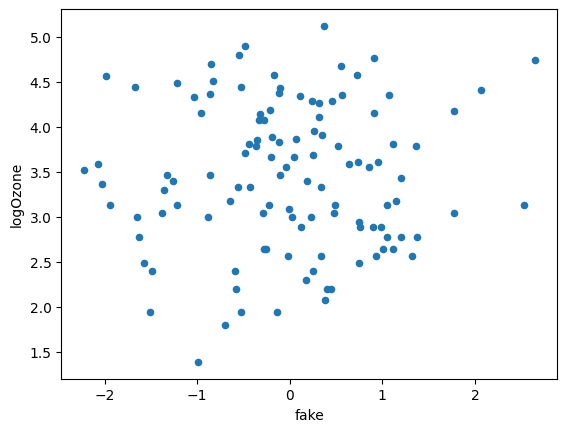

In [42]:
# First imagine we had even MORE explanatory variables:

# lets make a "fake" variable:
Air["fake"] = stats.norm.rvs(size=len(Air))
print(Air.head())

Air.plot.scatter('fake',    'logOzone')

What would happen if we added this "fake" variable to the full model?

In [43]:
fit_full_model = smf.ols(formula = 'logOzone ~ Temp + SolarR + Wind + fake', data=Air).fit()
print(fit_full_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.661
No. Observations:                 110   F-statistic:                     54.25
Covariance Type:            nonrobust   Prob (F-statistic):           1.03e-24
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2552      0.523      0.488      0.627      -0.782       1.292
Temp           0.0446      0.006      7.801      0.000       0.033       0.056
SolarR         0.0022      0.001      4.166      0.000       0.001       0.003
Wind          -0.0692      0.015     -4.743      0.000      -0.098      -0.040
fake           0.0146      0.045      0.324      0.747      -0.075       0.104

Notes:
[1] Standard Errors assume that the covarian

The "slope" parameter for "fake" is not significant (not significantly different from zero). We see this fram the p-value, which is 0.747 (much larger than 0.05).

This is because "fake" carries no information - it is just random values and has no correlation with the outcome variable.

**Model Selection:**

So the question is how to choose which variable to include in a model - its not always better to include more variables. 

There are different approaches for selecting which explanatory variables to include in the model (*model selection*):

*Backward selection*: Remove the least significant variables one at the time

*Forward selection*: Start with the most significant variable and add one at the time

OBS: There is no perfect way to do model selection! One should also be aware of possible correlations in explanatory variables. 

### Example: Model control

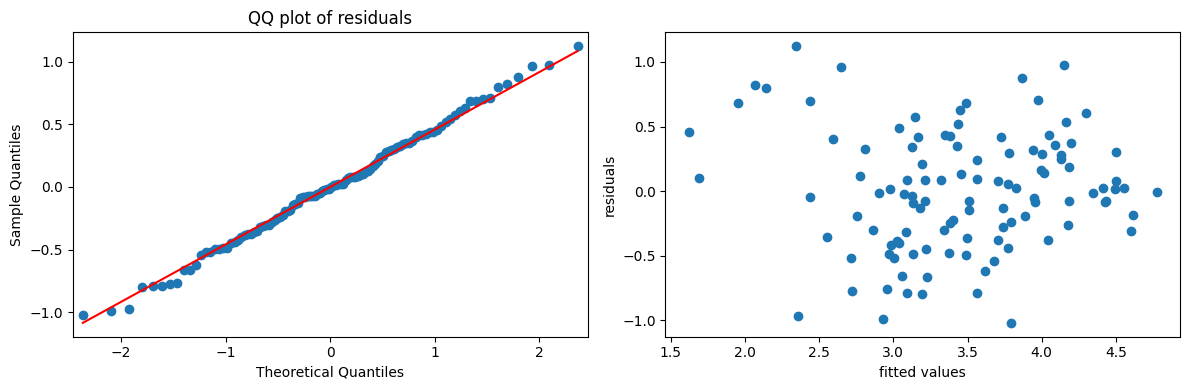

In [44]:
# full model with 3 explanatory variables:
fit_full_model = smf.ols(formula = 'logOzone ~ Temp + SolarR + Wind', data=Air).fit()

# residuals:
residuals = fit_full_model.resid
fittedvalues = fit_full_model.fittedvalues

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

# qq-plot of resiudals:
sm.qqplot(residuals,ax=ax1, line='s')
ax1.set_title("QQ plot of residuals")

# plot residuals versus fitted values:
ax2.scatter(fittedvalues,residuals)
ax2.set_xlabel("fitted values")
ax2.set_ylabel("residuals")

plt.tight_layout()
plt.show()

qq-plot: check normality of residuals (this one looks fine because the points are almost on the straight line)

scatter plot is used to look for patterns in residuals (here we se no obvious pattern - at least not a strong one)

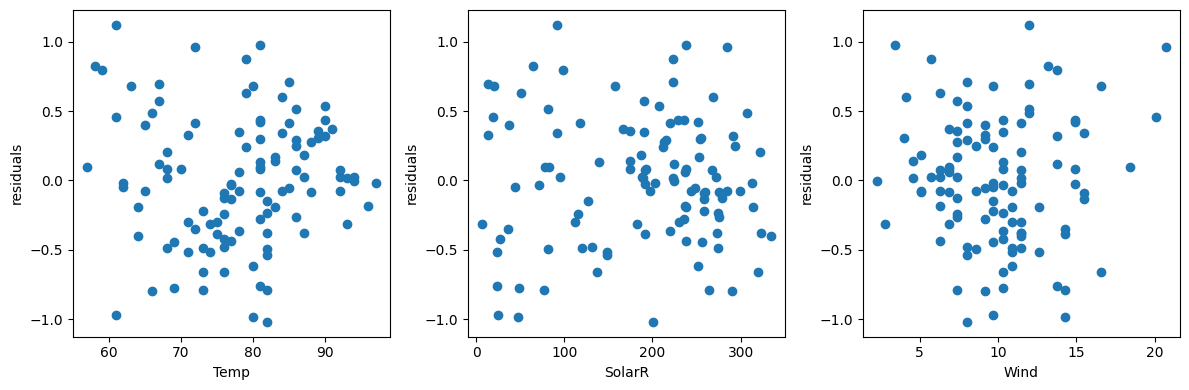

In [45]:
# plot residuals versus individual explanatory variables:
Air["residuals"] = residuals
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12,4))

# plot residuals versus fitted values:
# first subplot
ax0.scatter(Air["Temp"],Air["residuals"])
ax0.set_xlabel("Temp")
ax0.set_ylabel("residuals")
# second subplot
ax1.scatter(Air["SolarR"],Air["residuals"])
ax1.set_xlabel("SolarR")
ax1.set_ylabel("residuals")
# third subplot
ax2.scatter(Air["Wind"],Air["residuals"])
ax2.set_xlabel("Wind")
ax2.set_ylabel("residuals")

plt.tight_layout() # this makes sure that the plots do not overlap
plt.show()

Here we see no obvious patterns in the residuals - which is good!

### Example: curvilinear regression

<Axes: xlabel='Temp', ylabel='logOzone'>

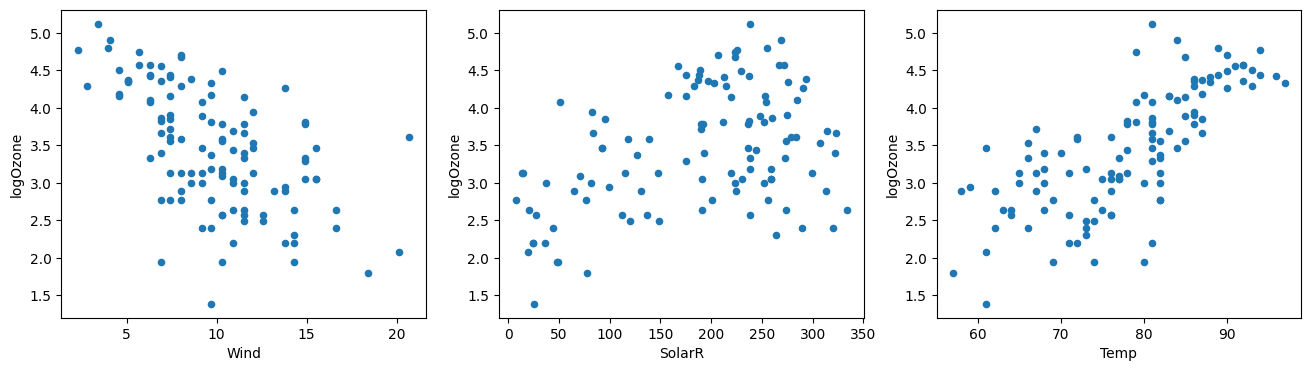

In [46]:
# Look at the original data (but with log(ozone))

# split to make 4 plots:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16,4))

# scatter plots with logOzone versus the three other columns
Air.plot.scatter('Wind',    'logOzone', ax=ax0)
Air.plot.scatter('SolarR', 'logOzone', ax=ax1)
Air.plot.scatter('Temp',    'logOzone', ax=ax2)

Would it be a good idea to include some squared terms?

Lets try with **Wind**:

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
No. Observations:                 115   F-statistic:                     57.65
Covariance Type:            nonrobust   Prob (F-statistic):           9.73e-12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7377      0.181     26.227      0.000       4.380       5.096
Wind          -0.1307      0.017     -7.593      0.000      -0.165      -0.097

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


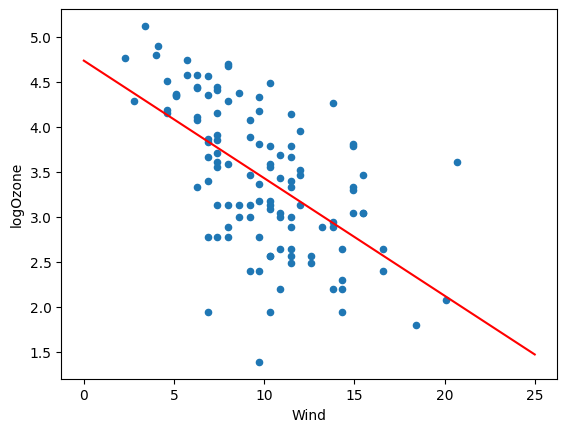

In [47]:
# Linear model with wind (simple linear regression):

# fit the model
fit_wind = smf.ols(formula = 'logOzone ~ Wind', data=Air).fit()
print(fit_wind.summary(slim=True))

# Get prediction based on the model:
wind_range = pd.DataFrame({'Wind': np.arange(0,25.5,.5)})
pred = fit_wind.get_prediction(wind_range).summary_frame(alpha=0.05)

# Plot data with model predictions:
Air.plot.scatter('Wind',    'logOzone')
plt.plot(wind_range, pred["mean"], color="red")
plt.show()

In [48]:
# make column with wind-squared values:
Air["Wind2"] = Air["Wind"]**2

print(Air.head())

   Ozone  SolarR  Wind  Temp  Month  Day  logOzone      fake  residuals  \
0   41.0   190.0   7.4    67      5    1  3.713572 -0.488099   0.570031   
1   36.0   118.0   8.0    72      5    2  3.583519 -2.068576   0.416974   
2   12.0   149.0  12.6    74      5    3  2.484907  0.750776  -0.519755   
3   18.0   313.0  11.5    62      5    4  2.890372  0.126254  -0.016249   
4    NaN     NaN  14.3    56      5    5       NaN  0.812259        NaN   

    Wind2  
0   54.76  
1   64.00  
2  158.76  
3  132.25  
4  204.49  


In [49]:
# Model with Wind and Wind2

# fit the model
fit_wind2 = smf.ols(formula = 'logOzone ~ Wind + Wind2', data=Air).fit()
print(fit_wind2.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.377
No. Observations:                 115   F-statistic:                     35.44
Covariance Type:            nonrobust   Prob (F-statistic):           1.19e-12
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7535      0.379     15.168      0.000       5.002       6.505
Wind          -0.3458      0.073     -4.723      0.000      -0.491      -0.201
Wind2          0.0100      0.003      3.016      0.003       0.003       0.017

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


This looks great - wind-squared is also significant. 

Is it a better model than the linear one?

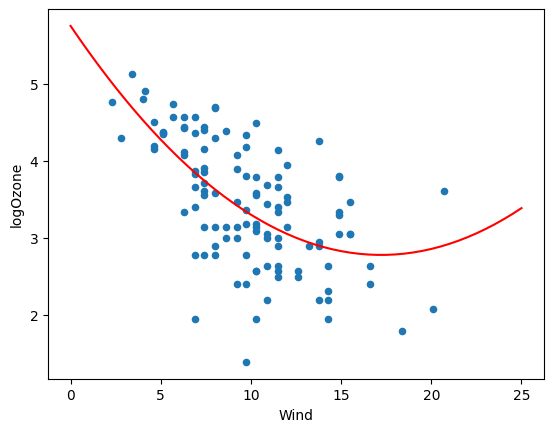

In [50]:
# Visual inspection:

# Get prediction based on the model:
wind_range["Wind2"] = wind_range["Wind"]**2
pred2 = fit_wind2.get_prediction(wind_range).summary_frame(alpha=0.05)

# Plot data with model predictions:
Air.plot.scatter('Wind',    'logOzone')
plt.plot(wind_range["Wind"], pred2["mean"], color="red")
plt.show()

Is it a better model?

Is it an *"overfit"*?

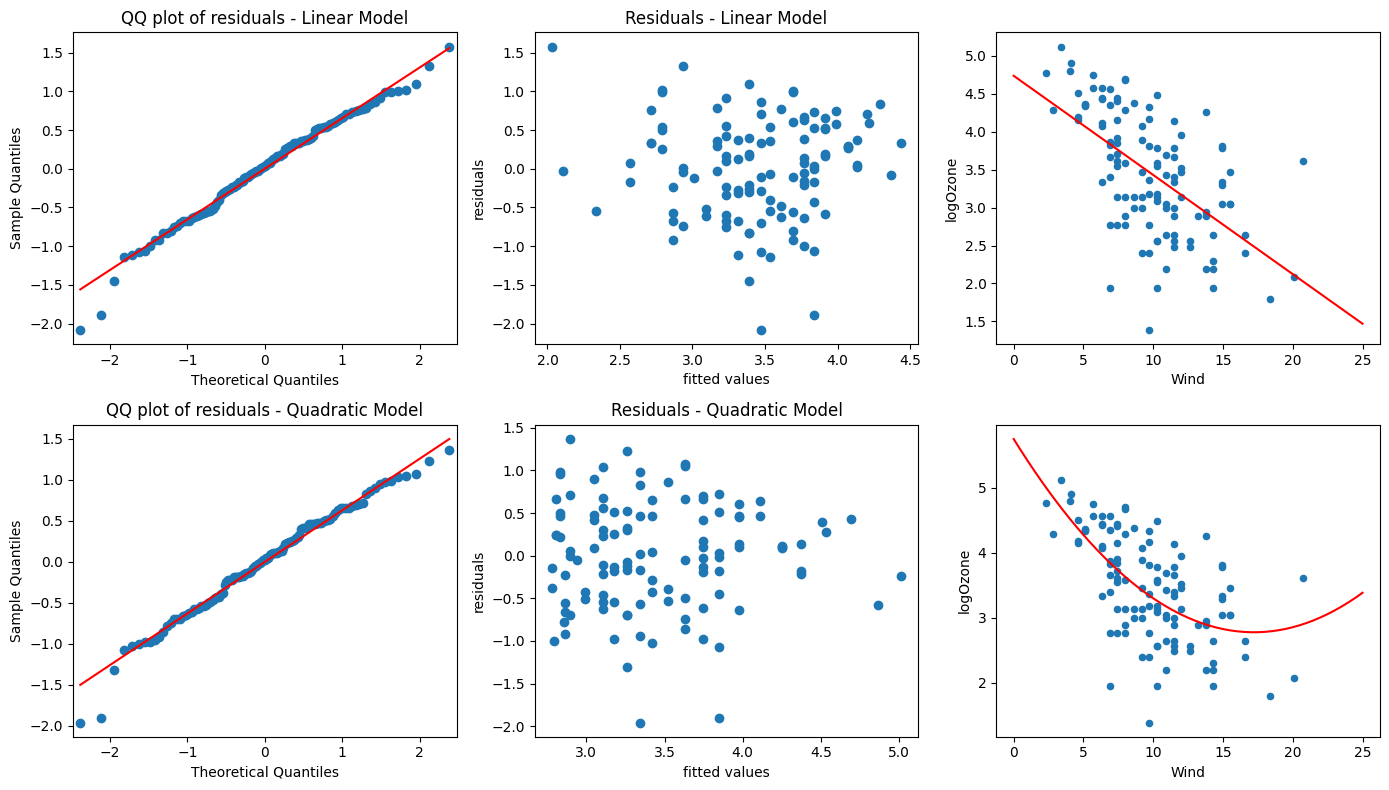

In [51]:
# lets have a quick look at the residuals in both linear and quadratic cases:
# residuals:
residuals = fit_wind.resid
fittedvalues = fit_wind.fittedvalues

residuals2 = fit_wind2.resid
fittedvalues2 = fit_wind2.fittedvalues


fig, axs = plt.subplots(2,3,figsize=(14,8))

# for linear model:
# qq-plot of resiudals:
sm.qqplot(residuals,ax=axs[0,0], line='s')
axs[0,0].set_title("QQ plot of residuals - Linear Model")

# plot residuals versus fitted values:
axs[0,1].scatter(fittedvalues,residuals)
axs[0,1].set_xlabel("fitted values")
axs[0,1].set_ylabel("residuals")
axs[0,1].set_title("Residuals - Linear Model")

# plot data with model
Air.plot.scatter('Wind',    'logOzone', ax = axs[0,2])
axs[0,2].plot(wind_range["Wind"], pred["mean"], color="red")

# for quadratic model:
# qq-plot of resiudals:
sm.qqplot(residuals2,ax=axs[1,0], line='s')
axs[1,0].set_title("QQ plot of residuals - Quadratic Model")

# plot residuals versus fitted values:
axs[1,1].scatter(fittedvalues2,residuals2)
axs[1,1].set_xlabel("fitted values")
axs[1,1].set_ylabel("residuals")
axs[1,1].set_title("Residuals - Quadratic Model")

# plot data with model
Air.plot.scatter('Wind',    'logOzone', ax = axs[1,2])
axs[1,2].plot(wind_range["Wind"], pred2["mean"], color="red")


plt.tight_layout()
plt.show()

Which model is better?

### **>>> Kahoot (1 question)**

Maybe it would make more sense to include a quadratic term for the SolarR-variable. You van try this yourself (simply change Wind and Wind2 to SolarR and SolarR2 in the code above)!

### Example: Colinearity and confounding

In [52]:
# lets make a fake variable which is super correlated to Wind:
Air["fake_wind"] = 2*Air["Wind"] + stats.norm.rvs(size=len(Air), loc=0, scale=1)
print(Air.head())

   Ozone  SolarR  Wind  Temp  Month  Day  logOzone      fake  residuals  \
0   41.0   190.0   7.4    67      5    1  3.713572 -0.488099   0.570031   
1   36.0   118.0   8.0    72      5    2  3.583519 -2.068576   0.416974   
2   12.0   149.0  12.6    74      5    3  2.484907  0.750776  -0.519755   
3   18.0   313.0  11.5    62      5    4  2.890372  0.126254  -0.016249   
4    NaN     NaN  14.3    56      5    5       NaN  0.812259        NaN   

    Wind2  fake_wind  
0   54.76  14.176052  
1   64.00  16.072698  
2  158.76  25.780166  
3  132.25  23.214279  
4  204.49  29.030373  


<Axes: xlabel='fake_wind', ylabel='logOzone'>

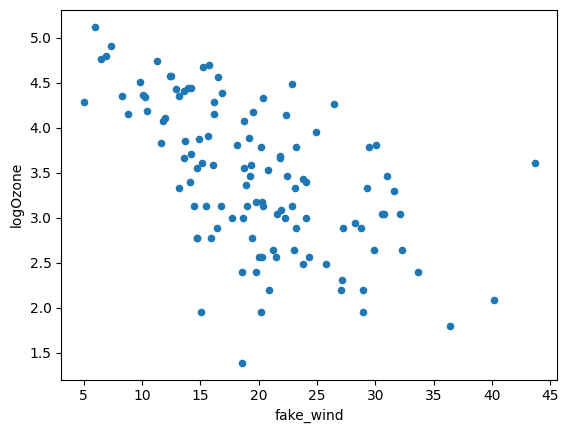

In [53]:
Air.plot.scatter('fake_wind',    'logOzone')

<Axes: xlabel='fake_wind', ylabel='Wind'>

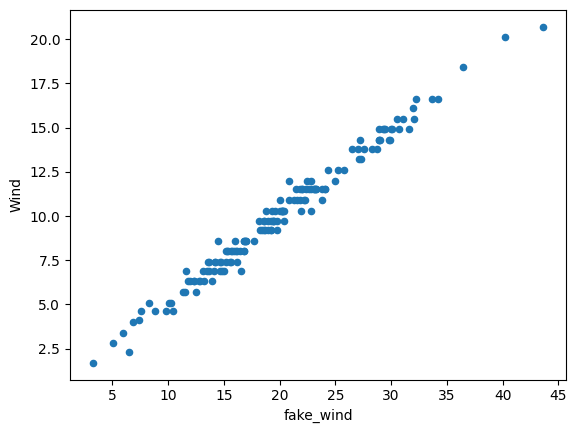

In [54]:
Air.plot.scatter('fake_wind',    'Wind')

In [55]:
# Now we fit a model using both Wind and fake_wind:
fit_full_model = smf.ols(formula = 'logOzone ~ Temp + SolarR + Wind + fake_wind', data=Air).fit()
print(fit_full_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:               logOzone   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.662
No. Observations:                 110   F-statistic:                     54.41
Covariance Type:            nonrobust   Prob (F-statistic):           9.27e-25
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1955      0.535      0.365      0.716      -0.866       1.257
Temp           0.0451      0.006      7.752      0.000       0.034       0.057
SolarR         0.0022      0.001      4.224      0.000       0.001       0.003
Wind          -0.0176      0.093     -0.188      0.851      -0.203       0.167
fake_wind     -0.0251      0.045     -0.561      0.576      -0.114       0.064

Notes:
[1] Standard Errors assume that the covarian

Both Wind and fake_wind become insignificant. (blackboard) 

### **>>> Kahoot (1 question)**






### Ekstra examples

In [57]:
treatment_data = pd.read_csv("treatment_data.csv", sep=',')  # fir this code to work, you need to save the treatment_data.csv file in the same folder as you keep this notebook
print(treatment_data)
print(len(treatment_data))

    idnr Treat  Prewt  Postwt  diff
0      1  Cont  36.56   36.33 -0.23
1      2  Cont  40.50   36.29 -4.21
2      3  Cont  41.59   39.14 -2.45
3      4  Cont  33.52   39.09  5.57
4      5  Cont  35.38   34.47 -0.91
..   ...   ...    ...     ...   ...
67    68    FT  35.15   41.09  5.94
68    69    FT  37.83   41.90  4.07
69    70    FT  40.72   42.49  1.77
70    71    FT  38.96   41.54  2.58
71    72    FT  39.55   44.39  4.84

[72 rows x 5 columns]
72


In [58]:
# How many values in the categorical column (the column with text)?
print(treatment_data["Treat"].value_counts())

Treat
CBT     29
Cont    26
FT      17
Name: count, dtype: int64


<Axes: title={'center': 'diff'}, xlabel='Treat'>

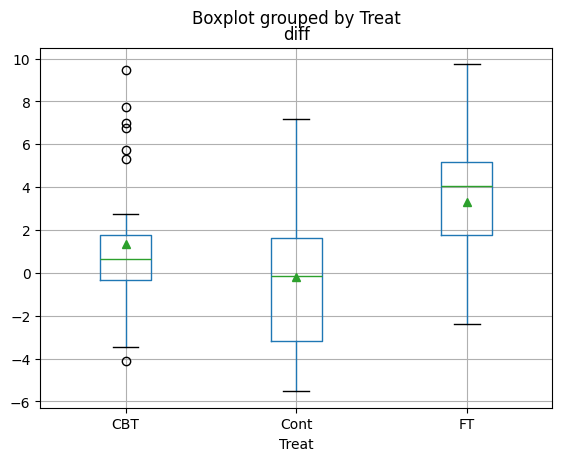

In [59]:
treatment_data.boxplot("diff", by='Treat', showmeans=True) # Boxplots using the built in function in pandas

The mean values (of each group) are indicated by triangles.

### Example: Compare two groups with linear regression:

In [60]:
# Make sample data with only two of the treatment groups:
sample_data = treatment_data[treatment_data['Treat'].isin(["Cont", "FT"])] # only keep the rows where the Treat column is either "Cont" or "FT"
print(len(sample_data))

43


<Axes: title={'center': 'diff'}, xlabel='Treat'>

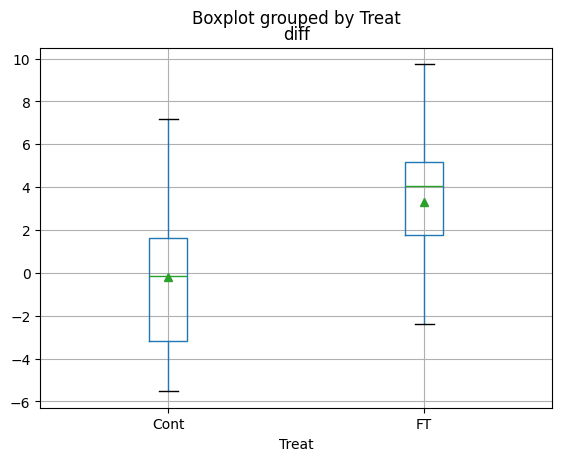

In [61]:
sample_data.boxplot("diff", by='Treat', showmeans=True) # Boxplots using the built in function in pandas

In [62]:
# Make a model with categorical variable:
sample_model = smf.ols(formula = 'diff ~ Treat', data=sample_data).fit()
print(sample_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.183
No. Observations:                  43   F-statistic:                     10.40
Covariance Type:            nonrobust   Prob (F-statistic):            0.00248
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2050      0.682     -0.301      0.765      -1.582       1.172
Treat[T.FT]     3.4962      1.084      3.224      0.002       1.306       5.686

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


Notice that the coefficient for FT treatment is 3.4962, which corresponds to the difference between the two means (see boxplot above).

Here the "Cont" group is chosen as a "reference group" and the effect of "FT" is shown in the model (Treat[T.FT] = 3.4962). This means that the average "diff" (i.e. the average weight-gain) in the FT group is 3.4962 higher than in the Cont group. 

### Example: Multiple linear regression with categorical AND quantitative variables

We can also add Prewt in the regression model - maybe the weight-gain ("diff") also depends on the weight prior to treatment

<Axes: xlabel='Prewt', ylabel='diff'>

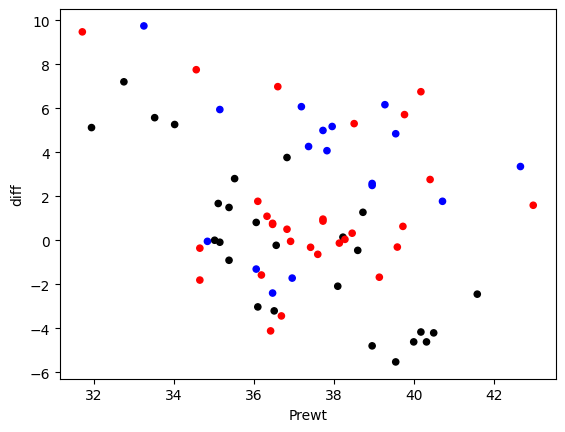

In [63]:
# Plot diff versus Prewt (pre-treatment weight)
# and indicate treatment group by color
colors = {'Cont':'black', 'CBT':'red', 'FT':'blue'}
treatment_data.plot.scatter("Prewt", "diff", c=treatment_data["Treat"].map(colors))


It seems that diff (weight-gain) is higher for the persons that had the lowest starting weight (smallest Prewt values).

The colors indicate the different treatment groups.

In [65]:
# Model with categorical variabel (+ continous variabel):
cat_model = smf.ols(formula = 'diff ~ Prewt + Treat', data=treatment_data).fit()
print(cat_model.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.236
No. Observations:                  72   F-statistic:                     8.317
Covariance Type:            nonrobust   Prob (F-statistic):           8.67e-05
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        22.5474      6.065      3.718      0.000      10.446      34.649
Treat[T.Cont]    -1.8575      0.858     -2.166      0.034      -3.569      -0.146
Treat[T.FT]       2.0665      0.966      2.138      0.036       0.138       3.995
Prewt            -0.5655      0.161     -3.510      0.001      -0.887      -0.244

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


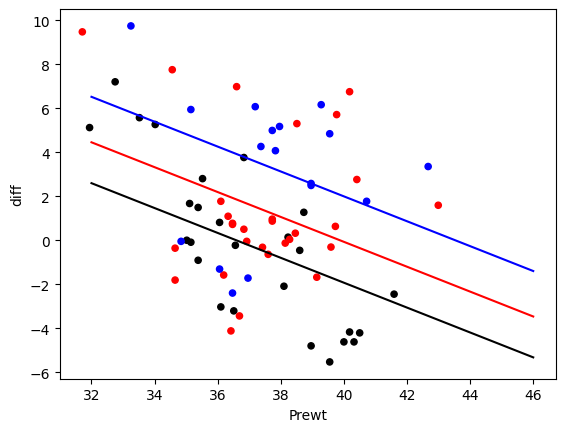

In [66]:
# Plot
x_values = np.arange(32,47,1)
y_values_cont = 22.5474 - 0.5655 * x_values - 1.8575
y_values_cbt  = 22.5474 - 0.5655 * x_values + 0
y_values_ft   = 22.5474 - 0.5655 * x_values + 2.0665

colors = {'Cont':'black', 'CBT':'red', 'FT':'blue'}
treatment_data.plot.scatter("Prewt", "diff", c=treatment_data["Treat"].map(colors))
plt.plot(x_values, y_values_cont, color="black")
plt.plot(x_values, y_values_cbt, color="red")
plt.plot(x_values, y_values_ft, color="blue")

plt.show()


This is a regression model with Prewt and tratment group as explanatory variables. The effect of Prewt is the same in all groups (the slope is the same in all groups), but the groups have different "levels". 